In [1]:
#Import Packages 

import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


import re
from nltk.corpus import stopwords
import time



In [2]:
#importing the training data

df=pd.read_csv('C:/Users/cy44l/Desktop/MSBA277/Project/Reviews.csv')
df.head()
#print('Unique user accounts : ', df['UserId'].nunique())
#print('Unique products : ', df['ProductId'].nunique())
#print('Unique reviews : ', df['Text'].nunique())

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
#checking for missing values
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [4]:
df.shape

(568454, 10)

In [5]:
# Dropping the columns we do not need
df = df.drop(['Id', 'ProfileName'], axis = 1) 

In [6]:
#Remove null values
df = df.dropna()

In [7]:
#checking for missing values
df.isnull().sum()

ProductId                 0
UserId                    0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [8]:
df.shape


(568427, 8)

In [9]:
# Check the number of rows and columns
rows, columns = df.shape
print("No of rows: ", rows) 
print("No of columns: ", columns)

#Check Data types
df.dtypes

No of rows:  568427
No of columns:  8


ProductId                 object
UserId                    object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [10]:
#Changing to Lowercase
df["Text"]=df['Text'].str.lower()

#Breaking apostrophe words into two
#Example -  're : are


# Create a dictionary of common apostrophe words
change_apostrophe = {
"n't" : " not",
"s'more" : "some more",  
"'re":" are",
"'ve" : " have",
"'ll" : " will",
"i'm" :"i am",
"'d": " did",
"'ve":" have",
 "c'mon": "come on" 
 }

#Replacing common apostrophe words
for each in change_apostrophe.keys():
    print('Replace ', each,' to ' ,change_apostrophe[each],' : ', len(df[df['Text'].str.findall(each).apply(len)>0]))
    df['Text']= df['Text'].str.replace(each,change_apostrophe[each])
#Remove punctuation marks


Replace  n't  to   not  :  189099
Replace  s'more  to  some more  :  164
Replace  're  to   are  :  32532
Replace  've  to   have  :  67324
Replace  'll  to   will  :  31164
Replace  i'm  to  i am  :  59300
Replace  'd  to   did  :  23547
Replace  c'mon  to  come on  :  147


In [11]:
#Remove new line tabs

(df['Text'].str.findall("[\t\n  ]").apply(len)>0).sum()
df['Text'] = df['Text'].str.replace('[\t\n]','')
(df['Text'].str.findall("[\t\n]").apply(len)>0).sum()

0

In [11]:
#Remove white spaces

df['Text'] = df['Text'].map(str.strip)

In [12]:
#Remove punctuation marks

df['Text'] = df['Text'].str.replace('[^\w\s]',' ')
print('This how text looks now:\n',df['Text'].head(2).values)

This how text looks now:
 ['i have bought several of the vitality canned dog food products and have found them all to be of good quality  the product looks more like a stew than a processed meat and it smells better  my labrador is finicky and she appreciates this product better than  most '
 'product arrived labeled as jumbo salted peanuts   the peanuts were actually small sized unsalted  not sure if this was an error or if the vendor intended to represent the product as  jumbo  ']


In [13]:
# Number of unique user id and product id in the data
print('Unique user accounts : ', df['UserId'].nunique())
print('Unique products : ', df['ProductId'].nunique())
print('Unique reviews : ', df['Text'].nunique())

Unique user accounts :  256056
Unique products :  74258
Unique reviews :  393556


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


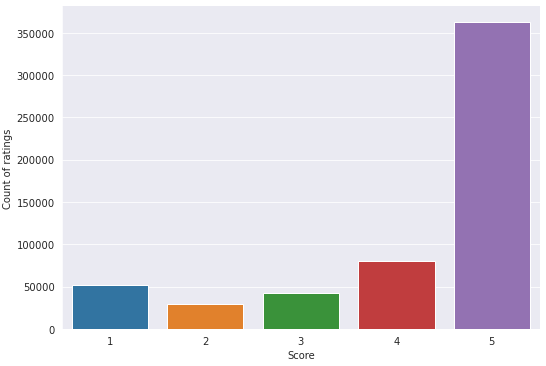

In [14]:
#Distribution of score
#We create a bar graph with score on X axis and Count on the Y axis
with sns.axes_style('darkgrid'):
    Score_D = sns.catplot("Score", data=df, aspect=1.5,kind='count')
    Score_D.set_ylabels("Count of ratings")
    
## There is an imblanace in data. The reviews are skwewed towards the positive

In [15]:
# converting unix time to year/month/day format, hour/min/sec is not available
df['Time_YMD']=df['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m-%d'))
#strftime('%Y-%m-%d %H:%M:%S'))
df['Time_YM']=df['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m'))
df.head()

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Time_YMD,Time_YM
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,2011-04-27,2011-04
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,2012-09-07,2012-09
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,2008-08-18,2008-08
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,2011-06-13,2011-06
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy,great taffy at a great price there was a wid...,2012-10-21,2012-10


In [19]:
df.to_csv (r'C:/Users/swapn/Downloads/277 midterm/Reviews_with_YMD.csv', index = False, header=True)

print (df)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/swapn/Downloads/277 midterm/Reviews_with_YMD.csv'

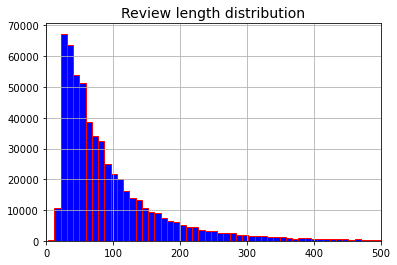

In [20]:
# lenght of review calculated stored in new column
df['Length_of_review']=df['Text'].apply(lambda col: len(col.split(' ')))


df['Length_of_review'].hist( color='b', edgecolor='red',
              linewidth=1,bins=500);
plt.xlim(0,500)
plt.title('Review length distribution',fontsize=14);

In [21]:
#The average length of reviews is 99 words for this dataset


df['Length_of_review'].describe()

count    568427.000000
mean         99.436543
std         102.819699
min           3.000000
25%          41.000000
50%          68.000000
75%         120.000000
max        4675.000000
Name: Length_of_review, dtype: float64

In [22]:
#Finding the top reviewers as the ones with more than 10reviews
#We create a new dataframe for top reviewers category
#For top reviewers, review count >10

Reviews_per_user= df.groupby(by=['UserId']).count().sort_values(by=['Text'],ascending=False)

Reviews_per_user.head()

Top_reviewer=Reviews_per_user[Reviews_per_user['ProductId']>10][['ProductId']]
Top_reviewer.head(10) 

,ProductId
UserId,
A3OXHLG6DIBRW8,448
A1YUL9PCJR3JTY,421
AY12DBB0U420B,389
A281NPSIMI1C2R,365
A1Z54EM24Y40LL,256
A1TMAVN4CEM8U8,204
A2MUGFV2TDQ47K,201
A3TVZM3ZIXG8YW,199
A3PJZ8TU8FDQ1K,178


count    6358.000000
mean       20.282951
std        18.982858
min        11.000000
25%        12.000000
50%        15.000000
75%        21.000000
max       448.000000
Name: ProductId, dtype: float64

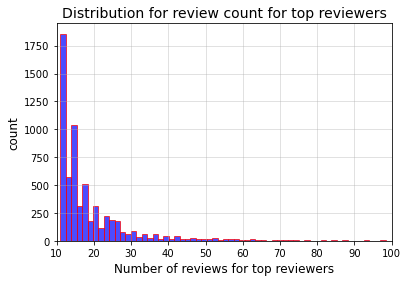

In [23]:
#We want to study the behaviour of the top reviewer category
#We conduct some exploratory data analysis to see 
#Distribution for review count per user

Top_reviewer['ProductId'].hist(bins=300,label='Number of reviews for Top (>12) reviewer',alpha=0.7,color='b', edgecolor='red',
              linewidth=1,);
plt.xlabel('Number of reviews for top reviewers',fontsize=12);
plt.ylabel('count',fontsize=12);

plt.grid(linewidth=0.5,alpha=0.75)

plt.xlim(10,100)
plt.title('Distribution for review count for top reviewers',fontsize=14);

#Describe top review data
Top_reviewer['ProductId'].describe()

#We see that in the top reviewer category, on an average writes about 20 reviews

In [24]:

# Let us now group the top reviewers
user_number_review=df.groupby(by=['UserId']).count().sort_values(by=['Text'],ascending=False)

user_number_review.head()


# Let us find the average info of top users
user_average_info=df.groupby(by=['UserId']).mean()

# Merging the above 2 datasets user average info and top reviewer
Avg_Top=pd.merge(user_average_info,Top_reviewer,how='inner',on='UserId')

# getting average data per user
user_average_info=df.groupby(by=['UserId']).mean()

# We define ratio hlpfulness
#Helpfulness Ratio  = HelpfulnessNumerator/HelpfulnessDenominator']

Avg_Top['Helpfullness_Ratio']=Avg_Top['HelpfulnessNumerator']/Avg_Top['HelpfulnessDenominator']


Avg_Top['Time_converted']=Avg_Top['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m'))

#We exclude any values not between 0 and 1
Avg_Top=Avg_Top[(Avg_Top['Helpfullness_Ratio']>0.0) & (Avg_Top['Helpfullness_Ratio']<1.0)]

In [25]:
colors = np.random.rand(Avg_Top.shape[0])

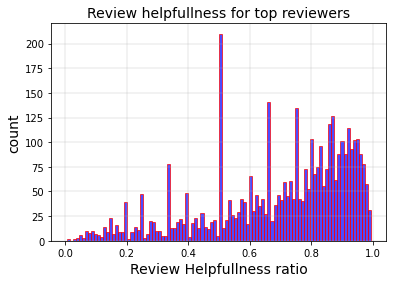

In [26]:
# Let us find how the review helpfulness distribution looks like
#As we can see from the histogtam below, values are concentrated on the right, which shows that top reviewers have higher helpfullness ratio.
#Users find top reviewers reviews very helpful and upvote them

Avg_Top['Helpfullness_Ratio'].hist(bins=100,label='review helpfullness top reviewers',alpha=0.7,color='b', edgecolor='red',linewidth=1);

plt.xlabel('Review Helpfullness ratio',fontsize=14);
plt.ylabel('count',fontsize=14);
plt.grid(linewidth=0.4,alpha=0.8)


plt.title('Review helpfullness for top reviewers',fontsize=14);

In [27]:
Avg_Top.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Length_of_review,ProductId,Helpfullness_Ratio,Time_converted
UserId,,,,,,,,
A100WO06OQR8BQ,0.836364,2.418182,3.109091,1.315171e+09,185.854545,55,0.345865,2011-09
A101P2KHWCU0G6,0.346154,1.653846,2.038462,1.338788e+09,330.230769,26,0.209302,2012-06
A102UXGLDF76G1,0.363636,0.545455,4.818182,1.243296e+09,108.636364,11,0.666667,2009-05
A1051DBTLWP5A2,1.000000,1.038462,4.615385,1.323053e+09,227.500000,26,0.962963,2011-12
A105S56ODHGJEK,0.111111,0.555556,3.222222,1.286256e+09,188.944444,18,0.200000,2010-10


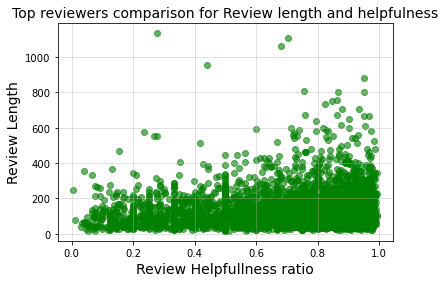

In [28]:
#Now let us compare how review helpfuless is related to review helpfullness
plt.scatter(Avg_Top['Helpfullness_Ratio'],Avg_Top['Length_of_review'],alpha=0.6, color = "green");

plt.ylabel('Review Length',fontsize=14);
plt.xlabel('Review Helpfullness ratio',fontsize=14);

plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Top reviewers comparison for Review length and helpfulness',fontsize=14);

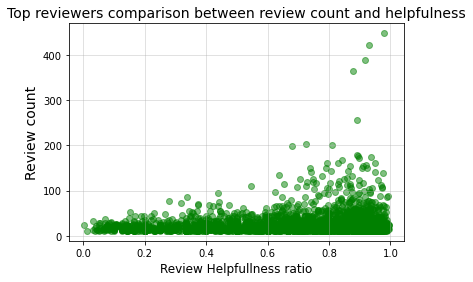

In [29]:
#Now let us compare how review helpfuless is related to review count
plt.scatter(Avg_Top['Helpfullness_Ratio'],Avg_Top['ProductId'],alpha=0.5, color = "green");

plt.ylabel('Review count',fontsize=14);
plt.xlabel('Review Helpfullness ratio',fontsize=12);
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Top reviewers comparison between review count and helpfulness',fontsize=14);


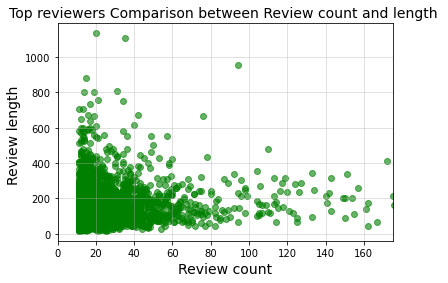

In [30]:
#Relationship between review length and review count
plt.scatter(Avg_Top['ProductId'],Avg_Top['Length_of_review'],alpha=0.6, color = "green"); #,c=Avg_Top['Helpfullness_Ratio'])
plt.xlim(0,175);

plt.xlabel('Review count',fontsize=14);
plt.ylabel('Review length ',fontsize=14);

plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Top reviewers Comparison between Review count and length ',fontsize=14);

In [31]:
#finding what types of food products get reviewed the most (top 300)
product_count=df.groupby('ProductId').count()
product_count
top_id=product_count.sort_values("UserId",ascending=False)[0:301]
top_id.reset_index(inplace=True)
top_id=top_id['ProductId'].values.tolist()
top_id



['B007JFMH8M',
 'B0026RQTGE',
 'B002QWHJOU',
 'B002QWP89S',
 'B002QWP8H0',
 'B003B3OOPA',
 'B001EO5Q64',
 'B0026KPDG8',
 'B000VK8AVK',
 'B006HYLW32',
 'B007M83302',
 'B007M832YY',
 'B001RVFEP2',
 'B001RVFERK',
 'B0026KNQSA',
 'B0013NUGDE',
 'B000KV7ZGQ',
 'B000KV61FC',
 'B0013A0QXC',
 'B005K4Q1YA',
 'B000NMJWZO',
 'B005K4Q34S',
 'B005K4Q37A',
 'B000UBD88A',
 'B005K4Q4LK',
 'B003GTR8IO',
 'B0090X8IPM',
 'B007Y59HVM',
 'B005ZBZLT4',
 'B006MONQMC',
 'B002IEVJRY',
 'B002YJ0118',
 'B002IEZJMA',
 'B000PDY3P0',
 'B000PDY3HI',
 'B000PDWBKO',
 'B001VJ0B0I',
 'B002LANN56',
 'B007TJGY46',
 'B006N3HZ6K',
 'B008FHUGNQ',
 'B0029XLH4Y',
 'B003CIBPN8',
 'B004SRH2B6',
 'B004SRFYMK',
 'B000CNB4LE',
 'B006N3IE6A',
 'B006N3IG4K',
 'B003VXFK44',
 'B003VXHGDM',
 'B003VXHGE6',
 'B003VXHGPK',
 'B003TC7WN4',
 'B004FGWU9O',
 'B003VXL0V6',
 'B0041NYV8E',
 'B000H0ZJHW',
 'B000H0ZJIG',
 'B000H1217M',
 'B0007A0AQW',
 'B000BRR8VQ',
 'B0007A0AQM',
 'B003QNLUTI',
 'B0029ZAOW8',
 'B001AS1A4Q',
 'B003D4F1QS',
 'B003D4IY

In [32]:
#subsetting data (only reviewing top 300 food products based on # of reviews written)
df_top = df[df['ProductId'].isin(top_id)]
len(df_top)
index_names1= df_top[df_top['HelpfulnessDenominator'] < df_top['HelpfulnessNumerator']].index
index_names2= df_top[df_top['HelpfulnessDenominator']==0].index
df_top.drop(index_names1,inplace=True)
df_top.drop(index_names2,inplace=True)
len(df_top)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


43891

In [33]:
#sentiment analysis
#!pip install textblob
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier
review_list_top = [];
for i in range(len(df_top['Text'])):
    review_list_top.append(str(df_top['Text'].iloc[i]).lower())

In [34]:
# getting the polarity and subjectivity
polarity = []
subjectivity = []
for Text in review_list_top:
    sentiment = TextBlob(Text).sentiment
    polarity.append(sentiment[0])
    subjectivity.append(sentiment[1])
df_top['polarity'] = polarity
df_top['subjectivity'] = subjectivity
df_top = df_top.reset_index(drop = True)
df_top.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Time_YMD,Time_YM,Length_of_review,polarity,subjectivity
0,B000G6RYNE,A3TX8RH943OLBM,3,5,2,1214006400,salt and vinegar chips,it was a great value and i like the package si...,2008-06-21,2008-06,29,0.533333,0.666667
1,B000G6RYNE,A3L4OZ0U0A5UDH,1,2,5,1349136000,Delicious!!,perfect they are my favorite because i can s...,2012-10-02,2012-10,26,0.583333,0.750000
2,B000G6RYNE,A2OEUROGZDTXUJ,1,2,4,1327968000,I like them.,amazon s suggestion for a 4 star review is i ...,2012-01-31,2012-01,111,0.183333,0.404167
3,B000G6RYNE,A30H2335OM7RD6,1,2,5,1316649600,Love Kettle Chips,these are a favorite at our home we like the ...,2011-09-22,2011-09,108,0.238571,0.600714
4,B000G6RYNE,A2SYKMR242D0X6,1,2,5,1292544000,Best unsalted chips,these are the best unsalted chips around and w...,2010-12-17,2010-12,30,0.725000,0.525000


In [35]:
#descriptive statistics for the sentiment
df_top.groupby(by = 'Score').mean()

,HelpfulnessNumerator,HelpfulnessDenominator,Time,Length_of_review,polarity,subjectivity
Score,,,,,,
1,4.032169,6.946155,1.306538e+09,110.871323,0.000662,0.528777
2,2.837679,4.727512,1.301890e+09,135.465573,0.100944,0.530856
3,3.048415,4.348329,1.299574e+09,152.287489,0.150645,0.529037
4,2.142771,2.836056,1.297373e+09,147.204779,0.220530,0.542100
5,3.694206,4.291127,1.288299e+09,116.433868,0.274881,0.559908


In [36]:
df_top.groupby(by = 'Score').describe()

HelpfulnessNumerator                                                  \
                     count      mean        std  min  25%  50%  75%    max   
Score                                                                        
1                   5813.0  4.032169  12.816798  0.0  1.0  2.0  4.0  436.0   
2                   3413.0  2.837679  10.485602  0.0  0.0  1.0  2.0  209.0   
3                   4668.0  3.048415  14.596795  0.0  0.0  1.0  2.0  491.0   
4                   6612.0  2.142771   6.539123  0.0  1.0  1.0  2.0  206.0   
5                  23385.0  3.694206  13.692580  0.0  1.0  1.0  2.0  488.0   

      HelpfulnessDenominator            ...  polarity      subjectivity  \
                       count      mean  ...       75%  max        count   
Score                                   ...                               
1                     5813.0  6.946155  ...  0.128549  1.0       5813.0   
2                     3413.0  4.727512  ...  0.200000  0.9       3413.0   
3                     4668.0  4.348329  ...  0.234219  1.0       4668.0   
4                     6612.0  2.836056  ...  0.301563  1.0       6612.0   
5                    23385.0  4.291127  ...  0.379167  1.0      23385.0   

                                                                   
           mean       std  min       25%       50%       75%  max  
Score                                                              
1      0.528777  0.178261  0.0  0.435000  0.532631  0.625000  1.0  
2      0.530856  0.131490  0.0  0.462500  0.522000  0.607143  1.0  
3      0.529037  0.117423  0.0  0.461174  0.525938  0.596345  1.0  
4      0.542100  0.120740  0.0  0.474701  0.537500  0.609573  1.0  
5      0.559908  0.129992  0.0  0.484877  0.558333  0.637500  1.0  

[5 rows x 48 columns]

In [37]:
df_top.groupby(by = 'ProductId').mean()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Length_of_review,polarity,subjectivity
ProductId,,,,,,,
B0001ES9F8,2.769231,3.410256,4.119658,1.212145e+09,86.324786,0.228679,0.529045
B0001ES9FI,3.797753,5.235955,4.202247,1.155519e+09,80.089888,0.259316,0.534917
B0007A0AQM,4.370787,5.775281,3.741573,1.301146e+09,111.820225,0.142083,0.577406
B0007A0AQW,4.370787,5.775281,3.741573,1.301146e+09,111.820225,0.142083,0.577406
B0009F3POY,4.539823,6.053097,3.982301,1.285821e+09,140.433628,0.120837,0.478025
...,...,...,...,...,...,...,...
B008ZRKZSM,5.841837,6.785714,4.346939,1.314002e+09,106.214286,0.259842,0.548952
B0090X8IPM,1.126984,2.026455,3.703704,1.293269e+09,178.333333,0.194904,0.558229
B0098WV8F2,5.111111,6.111111,3.866667,1.327091e+09,116.655556,0.216953,0.534408


In [38]:
#Focusing on top 10 products based on number of reviews written
print(df['ProductId'].value_counts()[:11])
#subsetting data (only reviewing top 10 food products based on # of reviews written)
food_id = ['B003B3OOPA','B000KV7ZGQ','B000KV61FC','B001EO5Q64','B005ZBZLT4','B007Y59HVM','B005K4Q4LK','B005K4Q34S','B005K4Q37A','B001VJ0B0I']
df_ten = df[df['ProductId'].isin(food_id)]
print(len(df_ten))
review_list_ten = [];
for i in range(len(df_ten['Text'])):
    review_list_ten.append(str(df_ten['Text'].iloc[i]).lower())
_polarity = []
_subjectivity = []
for Text in review_list_ten:
    sentiment = TextBlob(Text).sentiment
    _polarity.append(sentiment[0])
    _subjectivity.append(sentiment[1])
df_ten['polarity'] = _polarity
df_ten['subjectivity'] = _subjectivity
df_ten = df_ten.reset_index(drop = True)


B007JFMH8M    913
B002QWP89S    632
B0026RQTGE    632
B002QWP8H0    632
B002QWHJOU    632
B003B3OOPA    623
B001EO5Q64    567
B0026KNQSA    564
B007M832YY    564
B006HYLW32    564
B001RVFERK    564
Name: ProductId, dtype: int64
5419


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [39]:
df_ten.head()

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Time_YMD,Time_YM,Length_of_review,polarity,subjectivity
0,B000KV61FC,A1Y1YYH71TPYC6,2,2,5,1222905600,The best dog toy I ever bought :),i have two smaller dogs and they absolutely lo...,2008-10-02,2008-10,120,0.403274,0.665873
1,B000KV61FC,A1SLLKDKCZ5IPL,2,2,2,1221091200,Buried Treasure Forever!,the idea is basically a good one however my ...,2008-09-11,2008-09,72,0.255655,0.617560
2,B000KV61FC,A36DVV6R3PSIQA,2,2,5,1219017600,My Pugs love this!,i bought two of these for my pug puppies was...,2008-08-18,2008-08,168,0.049179,0.461574
3,B000KV61FC,A17D0C0KVRAVNK,2,2,5,1208044800,Great fun for my dogs!,my dogs love this toy they are golden lab mi...,2008-04-13,2008-04,189,0.241204,0.538294
4,B000KV61FC,AVTQSPZFK2900,2,2,5,1197590400,Provides Hours of Durable Fun for our Puppies!,i purchased our first busy buddy tug for hudso...,2007-12-14,2007-12,179,0.198732,0.495290


In [40]:
#descriptive statistics for the sentiment
df_ten.groupby(by = 'Score').mean() 

,HelpfulnessNumerator,HelpfulnessDenominator,Time,Length_of_review,polarity,subjectivity
Score,,,,,,
1,3.434397,5.331560,1.318967e+09,94.136525,0.003303,0.524191
2,1.072864,1.972362,1.314847e+09,125.298995,0.077265,0.544476
3,1.984095,2.938370,1.312050e+09,140.652087,0.142572,0.510475
4,1.239899,1.500000,1.320891e+09,125.561869,0.219894,0.542547
5,2.307400,2.600886,1.322292e+09,98.662239,0.305645,0.559332


<AxesSubplot:ylabel='ProductId'>

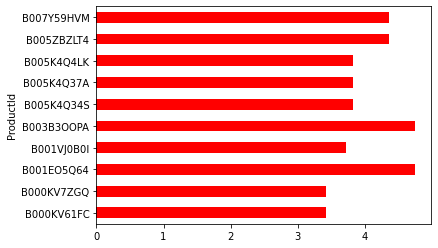

In [41]:
# creating a visualization for the ratings and polarities/subjectivities
Score_mean = df_ten.groupby("ProductId").Score.mean()
subjectivity_mean = df_ten.groupby('ProductId').subjectivity.mean()
polarity_mean = df_ten.groupby('ProductId').polarity.mean()

Score_mean.plot.barh(color='r')

<AxesSubplot:ylabel='ProductId'>

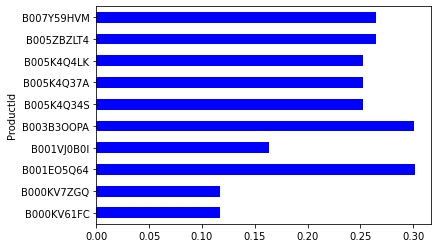

In [42]:
polarity_mean.plot.barh(color='b')

In [43]:
## Word cloud for negative and positive rating 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import string

In [45]:
# Need to download stopwords for nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cy44l\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
# stopwords that we will use to remove from text for analysis
stopwords.words('english')
# Number of stopwords
#len(stopwords.words('english'))

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
# Need for tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cy44l\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
## Removal of urls
def remove_urls(text):
    #url_pattern = re.compile(r'https?://\S+|www\.\S+')
    url_pattern = re.compile(r'com|http|www|href')
    return url_pattern.sub(r'', text)

df_top['Text'] = df_top['Text'].apply(lambda text: remove_urls(text))
df_top['Text'].head()

0    it was a great value and i like the package si...
1    perfect   they are my favorite because i can s...
2    amazon s suggestion for a 4 star review is  i ...
3    these are a favorite at our home  we like the ...
4    these are the best unsalted chips around and w...
Name: Text, dtype: object

In [49]:
stopwords_list = []

stopwords = set(stopwords.words('english'))
stopwords1 = stopwords.union(set(stopwords_list)) # stopwords into list

In [50]:
# function for tokenization including stemming 
from nltk.stem.porter import PorterStemmer

# Initialize stemmer using porterstemmer
stemmer = PorterStemmer()

def tokenize_stem(text):
    try: 
        regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]') 
        text = regex.sub(" ", text) 
        
        tokens1 = [word_tokenize(s) for s in sent_tokenize(text)] 
        tokens = []
        for token_by_sent in tokens1:
            tokens += token_by_sent
        tokens = list(filter(lambda t: t.lower() not in stopwords1, tokens))
        new_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
        new_tokens = [w.lower() for w in new_tokens if len(w)>=3]
        
        # Stemming 
        stems = [stemmer.stem(item) for item in new_tokens]
        return stems
    
    except TypeError as e: print(text,e)

In [51]:
df_top1 = df_top[df_top['Score'] == 1]
df_top2 = df_top[df_top['Score'] == 2]
df_top3 = df_top[df_top['Score'] == 3]
df_top4 = df_top[df_top['Score'] == 4]
df_top5 = df_top[df_top['Score'] == 5]

In [52]:
#Most common words of score1

# apply the tokenize_stem function 
# Convert text to string type 
df_top1['Text'] = df_top1['Text'].astype(str)


df_top1['tokens_stem'] = df_top1['Text'].map(tokenize_stem)
df_top1.reset_index(drop=True, inplace=True)

# Initializing TfidfVectorizer
tfidf_vec0_stem1 = TfidfVectorizer(min_df=0.005,
                             max_features=None,
                             tokenizer=tokenize_stem,
                             ngram_range=(2, 3) 
                            )

tfidf_e0_stem1 = df_top1['Text'].values
tfidf_vz0_stem1 = tfidf_vec0_stem1.fit_transform(list(tfidf_e0_stem1))

#Table that shows the frequency of the words
tfidf_table1 = dict(zip(tfidf_vec0_stem1.get_feature_names(), tfidf_vec0_stem1.idf_))

tfidf_table1 = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf_table1), orient='index')
tfidf_table1.columns = ['tfidf']

# Lower the TF IDF score, the more common the word 
tfidf_table1.sort_values(by=['tfidf'], ascending=True).head(10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tfidf
tast like,3.060023
wast money,4.022577
coconut water,4.130690
cup coffe,4.238678
flavor coffe,4.650744
would remend,4.705179
made china,4.712197
green mountain,4.719264
never buy,4.762749
read review,4.808212


In [53]:
#Most common words of score2

# apply the tokenize_stem function 
# Convert text to string type 
df_top2['Text'] = df_top2['Text'].astype(str)


df_top2['tokens_stem'] = df_top2['Text'].map(tokenize_stem)
df_top2.reset_index(drop=True, inplace=True)

# Initializing TfidfVectorizer
tfidf_vec0_stem2 = TfidfVectorizer(min_df=0.005,
                             max_features=None,
                             tokenizer=tokenize_stem,
                             ngram_range=(2, 3) 
                            )

tfidf_e0_stem2 = df_top2['Text'].values
tfidf_vz0_stem2 = tfidf_vec0_stem2.fit_transform(list(tfidf_e0_stem2))

#Table that shows the frequency of the words
tfidf_table2 = dict(zip(tfidf_vec0_stem2.get_feature_names(), tfidf_vec0_stem2.idf_))

tfidf_table2 = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf_table2), orient='index')
tfidf_table2.columns = ['tfidf']

# Lower the TF IDF score, the more common the word 
tfidf_table2.sort_values(by=['tfidf'], ascending=True).head(10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tfidf
tast like,3.121925
cup coffe,4.005741
thought would,4.208386
like coffe,4.491249
amazon product,4.550672
flavor coffe,4.571292
look like,4.581763
realli like,4.592345
would remend,4.592345
kind bar,4.624780


In [54]:
#Most common words of score3

# apply the tokenize_stem function 
# Convert text to string type 
df_top3['Text'] = df_top3['Text'].astype(str)


df_top3['tokens_stem'] = df_top3['Text'].map(tokenize_stem)
df_top3.reset_index(drop=True, inplace=True)

# Initializing TfidfVectorizer
tfidf_vec0_stem3 = TfidfVectorizer(min_df=0.005,
                             max_features=None,
                             tokenizer=tokenize_stem,
                             ngram_range=(2, 3) 
                            )

tfidf_e0_stem3 = df_top3['Text'].values
tfidf_vz0_stem3 = tfidf_vec0_stem3.fit_transform(list(tfidf_e0_stem3))

#Table that shows the frequency of the words
tfidf_table3 = dict(zip(tfidf_vec0_stem3.get_feature_names(), tfidf_vec0_stem3.idf_))

tfidf_table3 = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf_table3), orient='index')
tfidf_table3.columns = ['tfidf']

# Lower the TF IDF score, the more common the word 
tfidf_table3.sort_values(by=['tfidf'], ascending=True).head(10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tfidf
tast like,3.401328
cup coffe,3.993379
tast good,4.037054
amazon product,4.261314
coffe tast,4.318801
much better,4.431420
first time,4.431420
would buy,4.499940
realli like,4.550860
medium roast,4.573503


In [55]:
#Most common words of score4

# apply the tokenize_stem function 
# Convert text to string type 
df_top4['Text'] = df_top4['Text'].astype(str)


df_top4['tokens_stem'] = df_top4['Text'].map(tokenize_stem)
df_top4.reset_index(drop=True, inplace=True)

# Initializing TfidfVectorizer
tfidf_vec0_stem4 = TfidfVectorizer(min_df=0.005,
                             max_features=None,
                             tokenizer=tokenize_stem,
                             ngram_range=(2, 3) 
                            )

tfidf_e0_stem4 = df_top4['Text'].values
tfidf_vz0_stem4 = tfidf_vec0_stem4.fit_transform(list(tfidf_e0_stem4))

#Table that shows the frequency of the words
tfidf_table4 = dict(zip(tfidf_vec0_stem4.get_feature_names(), tfidf_vec0_stem4.idf_))

tfidf_table4 = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf_table4), orient='index')
tfidf_table4.columns = ['tfidf']

# Lower the TF IDF score, the more common the word 
tfidf_table4.sort_values(by=['tfidf'], ascending=True).head(10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tfidf
tast like,3.742353
cup coffe,3.921862
tast good,3.991658
amazon product,4.106433
realli like,4.154886
coffe maker,4.228448
tast great,4.236111
pretti good,4.259458
flavor coffe,4.430817
potato chip,4.488525


In [56]:
#Most common words of score5

# apply the tokenize_stem function 
# Convert text to string type 
df_top5['Text'] = df_top5['Text'].astype(str)


df_top5['tokens_stem'] = df_top5['Text'].map(tokenize_stem)
df_top5.reset_index(drop=True, inplace=True)

# Initializing TfidfVectorizer
tfidf_vec0_stem5 = TfidfVectorizer(min_df=0.005,
                             max_features=None,
                             tokenizer=tokenize_stem,
                             ngram_range=(2, 3) 
                            )

tfidf_e0_stem5 = df_top5['Text'].values
tfidf_vz0_stem5 = tfidf_vec0_stem5.fit_transform(list(tfidf_e0_stem5))

#Table that shows the frequency of the words
tfidf_table5 = dict(zip(tfidf_vec0_stem5.get_feature_names(), tfidf_vec0_stem5.idf_))

tfidf_table5 = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf_table5), orient='index')
tfidf_table5.columns = ['tfidf']

# Lower the TF IDF score, the more common the word 
tfidf_table5.sort_values(by=['tfidf'], ascending=True).head(10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tfidf
highli remend,3.805715
tast like,3.923410
cup coffe,4.076103
coconut oil,4.282246
tast great,4.367809
tast good,4.475101
peanut butter,4.529015
much better,4.643161
amazon product,4.649718
potato chip,4.664631


In [57]:
# For sentiment analysis
from textblob import TextBlob

In [66]:
# Function for sentiment analysis
def sentiment_analysis(reviews):
 # Create a function to get the subjectivity
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 # Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity'
 df_top["TextBlob_Subjectivity"] = df_top['Text'].apply(getSubjectivity)
 df_top["TextBlob_Polarity"] = df_top['Text'].apply(getPolarity)
 def getAnalysis(score):
  if score <= 0:
    return "Negative"
  else:
    return "Positive"
 df_top["TextBlob_Analysis"] = df_top["TextBlob_Polarity"].apply(getAnalysis)
 return reviews

In [67]:
# Running sentiment analysis
sentiment_analysis(df_top['Text'])

0        it was a great value and i like the package si...
1        perfect   they are my favorite because i can s...
2        amazon s suggestion for a 4 star review is  i ...
3        these are a favorite at our home  we like the ...
4        these are the best unsalted chips around and w...
                               ...                        
43886    there is a taste of sugar substitute  the afte...
43887    if anyone knows of one that does not have it  ...
43888    i enjoyed these k cups when i used them  they ...
43889    i am really baffled by the great differences o...
43890    this hot chocolate tastes like hot sugar water...
Name: Text, Length: 43891, dtype: object

In [68]:
df_top['TextBlob_Analysis'].value_counts()

Positive    38188
Negative     5703
Name: TextBlob_Analysis, dtype: int64

Text(0.5, 1.0, 'Polarity by Score')

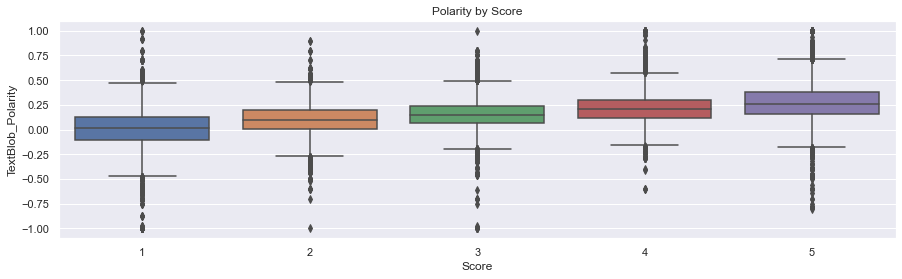

In [69]:
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

# Polarity for each age 
plt.figure(figsize=(15,4))
sns.boxplot(x='Score', y='TextBlob_Polarity', data=df_top).set_title("Polarity by Score")

In [70]:
df_top.groupby(["Score"]).mean()

,HelpfulnessNumerator,HelpfulnessDenominator,Time,Length_of_review,polarity,subjectivity,TextBlob_subjectivity,TextBlob_Polarity,TextBlob_Subjectivity
Score,,,,,,,,,
1,4.032169,6.946155,1.306538e+09,110.871323,0.000702,0.529033,0.529033,0.000702,0.529033
2,2.837679,4.727512,1.301890e+09,135.465573,0.101294,0.531233,0.531233,0.101294,0.531233
3,3.048415,4.348329,1.299574e+09,152.287489,0.151481,0.529740,0.529740,0.151481,0.529740
4,2.142771,2.836056,1.297373e+09,147.204779,0.221315,0.542429,0.542429,0.221315,0.542429
5,3.694206,4.291127,1.288299e+09,116.433868,0.275306,0.560173,0.560173,0.275306,0.560173


In [71]:
#Observe the relationship between helpfulness score and the words in the reviews (and polarity)
#calculation of helpfulness score 
df_top['helpfulness_score']=df_top['HelpfulnessNumerator']/df_top['HelpfulnessDenominator']
helpfulness=[]
for i in df_top['helpfulness_score']:
    if i>=0.5:
        helpfulness.append("helpful")
    else:
        helpfulness.append("not helpful")
        
df_top['helpfulness']=helpfulness
df_top

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Time_YMD,Time_YM,Length_of_review,polarity,subjectivity,TextBlob_Analysis,TextBlob_subjectivity,TextBlob_Polarity,TextBlob_Subjectivity,helpfulness_score,helpfulness
0,B000G6RYNE,A3TX8RH943OLBM,3,5,2,1214006400,salt and vinegar chips,it was a great value and i like the package si...,2008-06-21,2008-06,29,0.533333,0.666667,Positive,0.666667,0.533333,0.666667,0.600000,helpful
1,B000G6RYNE,A3L4OZ0U0A5UDH,1,2,5,1349136000,Delicious!!,perfect they are my favorite because i can s...,2012-10-02,2012-10,26,0.583333,0.750000,Positive,0.750000,0.583333,0.750000,0.500000,helpful
2,B000G6RYNE,A2OEUROGZDTXUJ,1,2,4,1327968000,I like them.,amazon s suggestion for a 4 star review is i ...,2012-01-31,2012-01,111,0.183333,0.404167,Positive,0.404167,0.183333,0.404167,0.500000,helpful
3,B000G6RYNE,A30H2335OM7RD6,1,2,5,1316649600,Love Kettle Chips,these are a favorite at our home we like the ...,2011-09-22,2011-09,108,0.238571,0.600714,Positive,0.600714,0.238571,0.600714,0.500000,helpful
4,B000G6RYNE,A2SYKMR242D0X6,1,2,5,1292544000,Best unsalted chips,these are the best unsalted chips around and w...,2010-12-17,2010-12,30,0.725000,0.525000,Positive,0.525000,0.725000,0.525000,0.500000,helpful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43886,B005K4Q68Q,A2A4HGFGKO6BKP,5,7,2,1323129600,"Weird after taste, sugar substitute",there is a taste of sugar substitute the afte...,2011-12-06,2011-12,63,-0.041667,0.616667,Negative,0.616667,-0.041667,0.616667,0.714286,helpful
43887,B005K4Q68Q,A37WXCXM9DXE4U,4,6,1,1322611200,Stay away from artificial sweeatners,if anyone knows of one that does not have it ...,2011-11-30,2011-11,54,-0.271333,0.835667,Negative,0.835667,-0.271333,0.835667,0.666667,helpful
43888,B005K4Q68Q,A3VIMB8ETZSZH0,2,3,1,1331510400,"Good taste, bad product",i enjoyed these k cups when i used them they ...,2012-03-12,2012-03,163,0.091667,0.460784,Positive,0.460784,0.091667,0.460784,0.666667,helpful
43889,B005K4Q68Q,A1ACY29BTHNJU2,2,3,4,1324512000,Very good hot cocoa.,i am really baffled by the great differences o...,2011-12-22,2011-12,128,0.223529,0.389706,Positive,0.389706,0.223529,0.389706,0.666667,helpful


In [62]:
#Identify relationship between polarity and subjectivity
##Logistic Regression Analysis in R.
!pip install seaborn -U

Requirement already up-to-date: seaborn in c:\users\swapn\anaconda3\lib\site-packages (0.11.1)


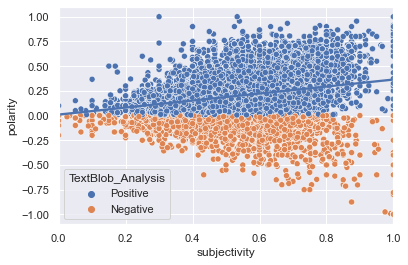

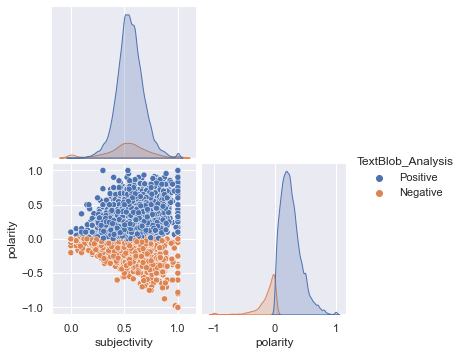

In [72]:
#polarity-subjectivity

regr2=sns.scatterplot(data=df_top, x='subjectivity' ,y='polarity', hue='TextBlob_Analysis')
sns.regplot(data=df_top,x='subjectivity' ,y='polarity', scatter=False, ax=regr2)
g=sns.pairplot(data=df_top[['subjectivity','polarity','TextBlob_Analysis']],hue='TextBlob_Analysis', corner=True,)

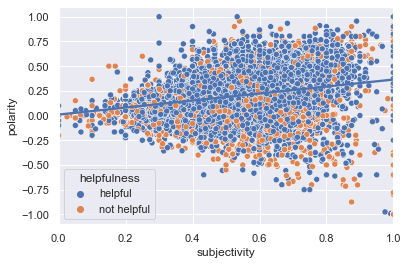

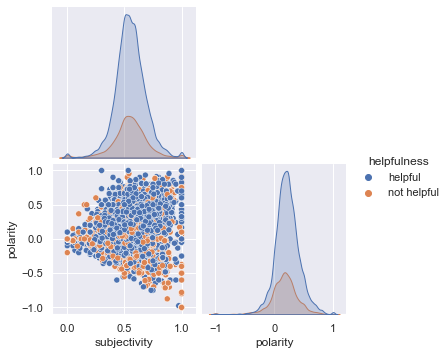

In [73]:
#subjectivity vs polarity - helpfulness
regr=sns.scatterplot(data=df_top, x='subjectivity' ,y='polarity', hue='helpfulness')
sns.regplot(data=df_top,x='subjectivity' ,y='polarity', scatter=False, ax=regr )

g2=sns.pairplot(data=df_top[['subjectivity','polarity','helpfulness']],hue='helpfulness', corner=True)


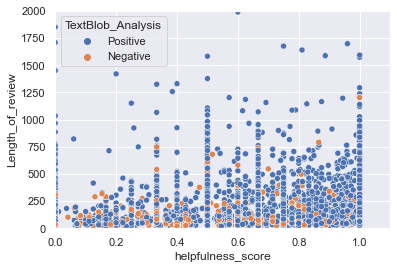

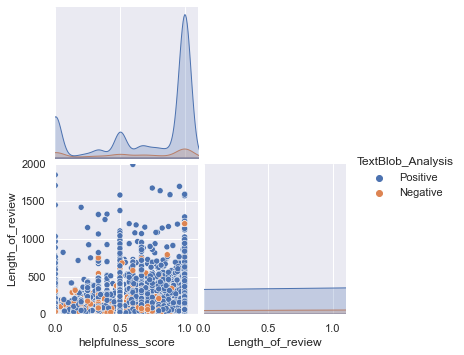

In [74]:
#length of review - helpfulness
regr3=sns.scatterplot(data=df_top, y='Length_of_review' ,x='helpfulness_score', hue='TextBlob_Analysis')
regr3.set(xlim=(0, 1.1))
regr3.set(ylim=(0, 2000))


g3=sns.pairplot(data=df_top[['helpfulness_score',"Length_of_review",'TextBlob_Analysis']],hue='TextBlob_Analysis', corner=True)
g3.set(xlim=(0, 1.1))
g3.set(ylim=(0, 2000))






In [75]:
df_top['Text'] = df_top['Text'].str.replace('[^\w\s]', "")
df_top.Text.head(5)

0    it was a great value and i like the package si...
1    perfect   they are my favorite because i can s...
2    amazon s suggestion for a 4 star review is  i ...
3    these are a favorite at our home  we like the ...
4    these are the best unsalted chips around and w...
Name: Text, dtype: object

In [76]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       h5b45459_0         173 KB  conda-forge
    certifi-2020.12.5          |   py37h03978a9_1         143 KB  conda-forge
    conda-4.9.2                |   py37h03978a9_0         3.0 MB  conda-forge
    openssl-1.1.1j             |       h8ffe710_0         5.8 MB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    wordcloud-1.8.1            |   py37hcc03f2d_1         194 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.3 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m
  wo

In [68]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [69]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df_top
# Dropping null values
reviews.dropna(inplace=True)
reviews.shape

(43891, 19)

In [70]:
score_1 = reviews[reviews['Score'] == 1]
score_2 = reviews[reviews['Score'] == 2]
score_3 = reviews[reviews['Score'] == 3]
score_4 = reviews[reviews['Score'] == 4]
score_5 = reviews[reviews['Score'] == 5]

In [71]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

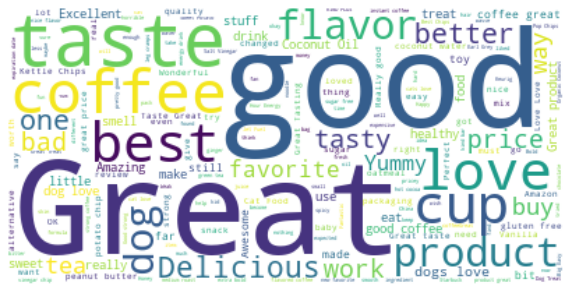

In [72]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [73]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or #5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

Text(0.5, 1.0, 'Reviews with Negative Scores')

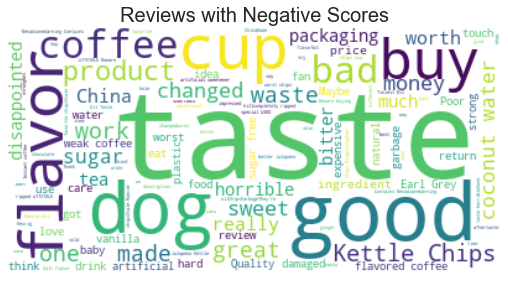

In [74]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

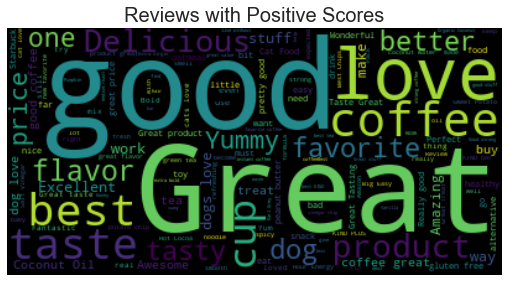

In [75]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()